### Make the LVAE model

In [1]:
import numpy as np
import torch
from tifffile import imread
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# We import all our dependencies.
import numpy as np
from tifffile import imread
from matplotlib import pyplot as plt
from boilerplate import boilerplate
from models.lvae import LadderVAE



NameError: name 'stochasticity' is not defined

In [2]:
#brisque of GT

brisq_gt = 30.01

#direct prediction of t0 from t[7,1] R()
R_psnrs   =  [30.27, 30.479, 30.915, 31.449, 32.151, 33.561, 36.122]
R_brisques = [28.177, 27.465, 28.042, 26.102, 26.21, 24.03, 24.222]

#unet prediction of t0 from t[7,1]
psnr_unet_base = 31.25
brisq_unet_base = 11.46

#hdn prediction of t0 from t[7,1]
psnr_hdn_base = 29.53
psnr_hdn_base_mmse = 29.81
brisq_hdn_base = 9.44

#the basic HDN + R() + cycleGAN predictions: C1
psnr_basic_C1 =  [24.889, 25.09, 25.3, 25.833, 25.989, 26.358, 26.055]
brisq_basic_C1 = [15.106, 16.216, 16.266, 20.186, 22.83, 28.796, 29.681]
psnrs_with_GT_t_C1 = [37.42, 34.045, 31.353, 29.696, 28.161, 26.813, 26.055]

#the basic HDN + R() + cycleGAN predictions + convex combination
psnr_basic_C2 =       [24.353933334350586, 24.458938598632812, 24.761808395385742, 25.148488998413086, 25.853254318237305, 27.442310333251953, 29.438190460205078]
psnrs_with_GT_t_C2 = [40.824832916259766, 37.94643783569336, 35.49945068359375, 33.05961990356445, 31.28070068359375, 30.08182144165039, 29.438190460205078]

#the basic HDN + R() + cycleGAN predictions + convex combination + fakeness loss
psnr_basic_C3 =  [24.316425323486328, 24.491518020629883, 24.709741592407227, 25.128820419311523, 25.873310089111328, 27.309188842773438, 29.393657684326172]
psnrs_with_GT_t_C3 = [40.560054779052734, 38.2090950012207, 35.46354675292969, 33.2198486328125, 31.53537368774414, 30.0367431640625, 29.393657684326172]


#HDNs
hdn1 = 30.38 # (Stoc, 5blks, lv=None, nF=64)
hdn2 = 30.69 # (Stoc, 5blks, lv=None, nF=128)
hdn3 = 30.93 # (Stoc, 5blks, lv=None, nF=256)

hdn1_ns = 29.97 # (Stoc, 5blks, lv=None, nF=64)
hdn2_ns = 30.29 # (Stoc, 5blks, lv=None, nF=128)
hdn3_ns = 30.57 # (Stoc, 5blks, lv=None, nF=256)

#Unet
unet1 = 31.68 


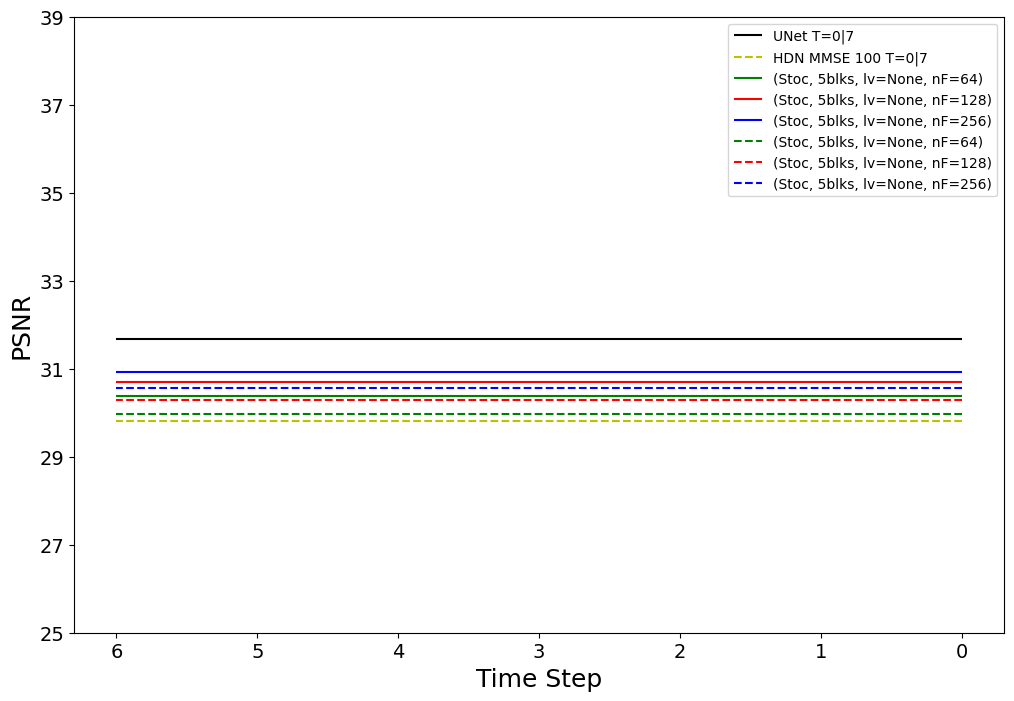

In [16]:
plt.figure(figsize=(12, 8))
plt.rc('legend',fontsize=10, loc='upper right') # using a size in points

#plot a horizontal line for the brisque of GT
plt.hlines(unet1, 0, 6, colors='k', linestyles='solid', label='UNet T=0|7')
plt.hlines(psnr_hdn_base_mmse, 0, 6, colors='y', linestyles='dashed', label='HDN MMSE 100 T=0|7')

plt.hlines(hdn1, 0, 6, colors='g', linestyles='solid', label='(Stoc, 5blks, lv=None, nF=64)')
plt.hlines(hdn2, 0, 6, colors='r', linestyles='solid', label='(Stoc, 5blks, lv=None, nF=128)')
plt.hlines(hdn3, 0, 6, colors='b', linestyles='solid', label='(Stoc, 5blks, lv=None, nF=256)')

plt.hlines(hdn1_ns, 0, 6, colors='g', linestyles='dashed', label='(Stoc, 5blks, lv=None, nF=64)')
plt.hlines(hdn2_ns, 0, 6, colors='r', linestyles='dashed', label='(Stoc, 5blks, lv=None, nF=128)')
plt.hlines(hdn3_ns, 0, 6, colors='b', linestyles='dashed', label='(Stoc, 5blks, lv=None, nF=256)')


plt.xticks(np.arange(0, 7, 1), fontsize=14)
plt.yticks(np.arange(25, 40, 2),fontsize=14)
#invert the x axis
plt.gca().invert_xaxis() #this is because the inference happens by reversing the time steps
plt.xlabel('Time Step', fontsize=18)
plt.ylabel('PSNR', fontsize=18)
#plt.title('PSNR of Unet models and time models vs Existing Sampling using D(;)', fontsize=18)
plt.legend()

From HDN and UNet Baselines